In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data.dataloader import default_collate
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [3]:
AQI_201806 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2018-06).csv')
AQI_201807 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2018-07).csv')
AQI_201808 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2018-08).csv')
AQI_201809 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2018-09).csv')
AQI_201810 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2018-10).csv')
AQI_201811 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2018-11).csv')
AQI_201812 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2018-12).csv')
AQI_201901 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-01).csv')
AQI_201902 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-02).csv')
AQI_201903 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-03).csv')
AQI_201904 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-04).csv')
AQI_201905 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-05).csv')
AQI_201906 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-06).csv')
AQI_201907 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-07).csv')
AQI_201908 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-08).csv')
AQI_201909 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-09).csv')
AQI_201910 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-10).csv')
AQI_201911 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-11).csv')
AQI_201912 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2019-12).csv')
AQI_202001 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-01).csv')
AQI_202002 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-02).csv')
AQI_202003 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-03).csv')
AQI_202004 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-04).csv')
AQI_202005 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-05).csv')
AQI_202006 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-06).csv')
AQI_202007 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-07).csv')
AQI_202008 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-08).csv')
AQI_202009 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-09).csv')
AQI_202010 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-10).csv')
AQI_202011 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-11).csv')
AQI_202012 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2020-12).csv')
AQI_202101 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-01).csv')
AQI_202102 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-02).csv')
AQI_202103 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-03).csv')
AQI_202104 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-04).csv')
AQI_202105 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-05).csv')
AQI_202106 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-06).csv')
AQI_202107 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-07).csv')
AQI_202108 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-08).csv')
AQI_202109 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-09).csv')
AQI_202110 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-10).csv')
AQI_202111 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-11).csv')
AQI_202112 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2021-12).csv')
AQI_202201 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-01).csv')
AQI_202202 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-02).csv')
AQI_202203 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-03).csv')
AQI_202204 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-04).csv')
AQI_202205 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-05).csv')
AQI_202206 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-06).csv')
AQI_202207 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-07).csv')
AQI_202208 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-08).csv')
AQI_202209 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-09).csv')
AQI_202210 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-10).csv')
AQI_202211 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-11).csv')
AQI_202212 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2022-12).csv')
AQI_202301 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2023-01).csv')
AQI_202302 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2023-02).csv')
AQI_202303 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2023-03).csv')
AQI_202304 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2023-04).csv')
AQI_202305 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/AQX_P_488_Resource/空氣品質指標(AQI)(歷史資料) (2023-05).csv')

In [4]:
# Train Data: 2018/06 - 2022/05
AQI_train_data_list = [AQI_201806, AQI_201807, AQI_201808, AQI_201809, AQI_201810, AQI_201811, AQI_201812, AQI_201901,
                       AQI_201902, AQI_201903, AQI_201904, AQI_201905, AQI_201906, AQI_201907, AQI_201908, AQI_201909,
                       AQI_201910, AQI_201911, AQI_201912, AQI_202001, AQI_202002, AQI_202003, AQI_202004, AQI_202005,
                       AQI_202006, AQI_202007, AQI_202008, AQI_202009, AQI_202010, AQI_202011, AQI_202012, AQI_202101, 
                       AQI_202102, AQI_202103, AQI_202104, AQI_202105, AQI_202106, AQI_202107, AQI_202108, AQI_202109,
                       AQI_202110, AQI_202111, AQI_202112, AQI_202201, AQI_202202, AQI_202203, AQI_202204, AQI_202205]
print(len(AQI_train_data_list))
# Test Data: 2022/06 - 2023/05
AQI_test_data_list = [AQI_202206, AQI_202207, AQI_202208, AQI_202209, AQI_202210, AQI_202211, AQI_202212,
                      AQI_202301, AQI_202302, AQI_202303, AQI_202304, AQI_202305]
print(len(AQI_test_data_list))

48
12


In [5]:
# Train
# Create empty DF
train_data = pd.DataFrame()
for train in AQI_train_data_list:
    train_data = pd.concat([train_data, train], axis=0, ignore_index=True)
# Test
# Create empty DF
test_data = pd.DataFrame()
for test in AQI_test_data_list:
    test_data = pd.concat([test_data, test], axis=0, ignore_index=True)

In [6]:
# release memory
for data in AQI_train_data_list, AQI_test_data_list:
    data = ''

Pick a location

In [7]:
# Location = 臺南
train_data = train_data[train_data['"sitename"']=='臺南']
test_data = test_data[test_data['"sitename"']=='臺南']
# Reset index
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [8]:
train_data

,"""sitename""","""county""","""aqi""","""pollutant""","""status""","""so2""","""co""","""o3""","""o3_8hr""","""pm10""",...,"""winddirec""","""datacreationdate""","""unit""","""co_8hr""","""pm2.5_avg""","""pm10_avg""","""so2_avg""","""longitude""","""latitude""","""siteid"""
0,臺南,臺南市,22.0,NaN,良好,2.6,0.22,15,17.0,12.0,...,359.0,2018-06-01 00:00,NaN,0.2,7.0,17.0,4.0,120.202617,22.984581,NaN
1,臺南,臺南市,24.0,NaN,良好,2.4,0.17,15,17.0,16.0,...,8.4,2018-06-01 01:00,NaN,0.2,7.0,16.0,4.0,120.202617,22.984581,NaN
2,臺南,臺南市,24.0,NaN,良好,2.4,0.1,16,16.0,15.0,...,1.4,2018-06-01 02:00,NaN,0.2,8.0,16.0,4.0,120.202617,22.984581,NaN
3,臺南,臺南市,23.0,NaN,良好,2.6,0.09,13,15.0,13.0,...,358.0,2018-06-01 03:00,NaN,0.2,7.0,16.0,4.0,120.202617,22.984581,NaN
4,臺南,臺南市,22.0,NaN,良好,2.9,0.11,11,15.0,13.0,...,46.0,2018-06-01 04:00,NaN,0.2,7.0,16.0,3.0,120.202617,22.984581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40089,臺南,臺南市,24.0,NaN,良好,0.3,0.12,23.2,26.1,12.0,...,219,2022-05-31 19:00,NaN,0,6.0,16.0,0.0,120.202617,22.984581,46.0
40090,臺南,臺南市,23.0,NaN,良好,0.3,0.11,20.4,25.0,13.0,...,219,2022-05-31 20:00,NaN,0,6.0,15.0,0.0,120.202617,22.984581,46.0
40091,臺南,臺南市,22.0,NaN,良好,0.2,0.11,21.4,24.2,15.0,...,207,2022-05-31 21:00,NaN,0.1,6.0,14.0,0.0,120.202617,22.984581,46.0
40092,臺南,臺南市,32.0,NaN,良好,0.2,0.14,12.8,22.2,21.0,...,187,2022-05-31 22:00,NaN,0.1,5.0,15.0,0.0,120.202617,22.984581,46.0


Tainan

In [9]:
tainan_aqi = pd.concat([train_data, test_data], axis=0, ignore_index=True)
tainan_aqi

,"""sitename""","""county""","""aqi""","""pollutant""","""status""","""so2""","""co""","""o3""","""o3_8hr""","""pm10""",...,"""winddirec""","""datacreationdate""","""unit""","""co_8hr""","""pm2.5_avg""","""pm10_avg""","""so2_avg""","""longitude""","""latitude""","""siteid"""
0,臺南,臺南市,22.0,NaN,良好,2.6,0.22,15,17.0,12.0,...,359.0,2018-06-01 00:00,NaN,0.2,7.0,17.0,4.0,120.202617,22.984581,NaN
1,臺南,臺南市,24.0,NaN,良好,2.4,0.17,15,17.0,16.0,...,8.4,2018-06-01 01:00,NaN,0.2,7.0,16.0,4.0,120.202617,22.984581,NaN
2,臺南,臺南市,24.0,NaN,良好,2.4,0.1,16,16.0,15.0,...,1.4,2018-06-01 02:00,NaN,0.2,8.0,16.0,4.0,120.202617,22.984581,NaN
3,臺南,臺南市,23.0,NaN,良好,2.6,0.09,13,15.0,13.0,...,358.0,2018-06-01 03:00,NaN,0.2,7.0,16.0,4.0,120.202617,22.984581,NaN
4,臺南,臺南市,22.0,NaN,良好,2.9,0.11,11,15.0,13.0,...,46.0,2018-06-01 04:00,NaN,0.2,7.0,16.0,3.0,120.202617,22.984581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48789,臺南,臺南市,57.0,細懸浮微粒,普通,0.5,0.25,18.0,29.5,40.0,...,323,2023-05-31 19:00,NaN,0.2,18.0,51.0,1.0,120.220850,22.991230,46.0
48790,臺南,臺南市,55.0,細懸浮微粒,普通,0.5,0.26,15.1,24.7,35.0,...,353,2023-05-31 20:00,NaN,0.2,17.0,50.0,1.0,120.220850,22.991230,46.0
48791,臺南,臺南市,49.0,NaN,良好,0.4,0.25,14.1,21.2,24.0,...,352,2023-05-31 21:00,NaN,0.2,15.0,45.0,1.0,120.220850,22.991230,46.0
48792,臺南,臺南市,44.0,NaN,良好,0.5,0.22,12.1,17.2,25.0,...,355,2023-05-31 22:00,NaN,0.2,14.0,39.0,1.0,120.220850,22.991230,46.0


Pick columns needed

In [8]:
cols_needed = ['"aqi"', '"datacreationdate"', '"windspeed"', '"winddirec"']
train_data_use = train_data[cols_needed]
test_data_use = test_data[cols_needed]

In [9]:
train_data_use

,"""aqi""","""datacreationdate""","""windspeed""","""winddirec"""
0,22.0,2018-06-01 00:00,2.1,359.0
1,24.0,2018-06-01 01:00,2.4,8.4
2,24.0,2018-06-01 02:00,2.0,1.4
3,23.0,2018-06-01 03:00,1.9,358.0
4,22.0,2018-06-01 04:00,2.4,46.0
...,...,...,...,...
40089,24.0,2022-05-31 19:00,1,219
40090,23.0,2022-05-31 20:00,1.4,219
40091,22.0,2022-05-31 21:00,1.1,207
40092,32.0,2022-05-31 22:00,0.7,187


In [10]:
test_data_use

,"""aqi""","""datacreationdate""","""windspeed""","""winddirec"""
0,18.0,2022-06-01 00:00,0.8,157
1,22.0,2022-06-01 01:00,0.8,172
2,23.0,2022-06-01 02:00,1,169
3,27.0,2022-06-01 03:00,1.5,143
4,31.0,2022-06-01 04:00,1.9,139
...,...,...,...,...
8695,57.0,2023-05-31 19:00,0.5,323
8696,55.0,2023-05-31 20:00,0.7,353
8697,49.0,2023-05-31 21:00,0.6,352
8698,44.0,2023-05-31 22:00,0.6,355


Merge weather data

In [11]:
weather_1 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/tainan_weather.csv')
weather_2 = pd.read_csv('/content/drive/MyDrive/BigDataAnalyticsandDataMining/Final/tainan_weather-1.csv')

In [ ]:
weather_1

In [ ]:
weather_2

In [12]:
# Keep only AQI related columns
cols_needed = ['觀測時間(hour)', '氣溫(℃)', '相對溼度(%)', '最大陣風(m/s)', '降水量(mm)', '降水時數(h)']
weather_1 = weather_1[cols_needed]
weather_2 = weather_2[cols_needed]

In [13]:
# Turn weather 1 into data format
start_date = pd.to_datetime('2018-06-01')
end_date = pd.to_datetime('2020-06-12') + pd.DateOffset(days=1) - pd.DateOffset(minutes=1)
date_range = pd.date_range(start=start_date, end=end_date, freq='H')
weather_1['觀測時間(hour)'] = date_range.strftime('%Y-%m-%d ') + (weather_1['觀測時間(hour)'] - 1).astype(str).str.zfill(2) + ':00'
# Turn weather 2 into data format
start_date = pd.to_datetime('2020-06-13')
end_date = pd.to_datetime('2023-05-31') + pd.DateOffset(days=1) - pd.DateOffset(minutes=1)
date_range = pd.date_range(start=start_date, end=end_date, freq='H')
weather_2['觀測時間(hour)'] = date_range.strftime('%Y-%m-%d ') + (weather_2['觀測時間(hour)'] - 1).astype(str).str.zfill(2) + ':00'

In [14]:
weather = pd.concat([weather_1,weather_2], axis=0, ignore_index=True)
weather

,觀測時間(hour),氣溫(℃),相對溼度(%),最大陣風(m/s),降水量(mm),降水時數(h)
0,2018-06-01 00:00,29.2,76,7.5,0.0,0.0
1,2018-06-01 01:00,28.8,78,7.1,0.0,0.0
2,2018-06-01 02:00,29.0,77,5.1,0.0,0.0
3,2018-06-01 03:00,28.6,79,5.3,0.0,0.0
4,2018-06-01 04:00,28.5,79,5.9,0.0,0.0
...,...,...,...,...,...,...
43819,2023-05-31 19:00,28.7,74,9.3,0.0,0.0
43820,2023-05-31 20:00,28.4,77,8.2,0.0,0.0
43821,2023-05-31 21:00,28.0,79,9.3,0.0,0.0
43822,2023-05-31 22:00,27.8,81,6.5,0.0,0.0


In [15]:
# Merge weather data to train/test data
train_data_use = train_data_use.merge(weather, left_on='"datacreationdate"', right_on='觀測時間(hour)', how='left')
test_data_use = test_data_use.merge(weather, left_on='"datacreationdate"', right_on='觀測時間(hour)', how='left')
train_data_use.drop(['觀測時間(hour)'], axis=1, inplace=True)
test_data_use.drop(['觀測時間(hour)'], axis=1, inplace=True)

In [16]:
# Cleanse NAs of string format
train_data_use.replace(['X','T','V','…'], np.nan, inplace=True)
test_data_use.replace(['X','T','V','…'], np.nan, inplace=True)
# Convert dtype to float 
convert_col = ['"aqi"','"windspeed"','"winddirec"','氣溫(℃)','相對溼度(%)','最大陣風(m/s)','降水量(mm)','降水時數(h)']
train_data_use[convert_col] = train_data_use[convert_col].astype(float)
test_data_use[convert_col] = test_data_use[convert_col].astype(float)

In [17]:
train_data_use

,"""aqi""","""datacreationdate""","""windspeed""","""winddirec""",氣溫(℃),相對溼度(%),最大陣風(m/s),降水量(mm),降水時數(h)
0,22.0,2018-06-01 00:00,2.1,359.0,29.2,76.0,7.5,0.0,0.0
1,24.0,2018-06-01 01:00,2.4,8.4,28.8,78.0,7.1,0.0,0.0
2,24.0,2018-06-01 02:00,2.0,1.4,29.0,77.0,5.1,0.0,0.0
3,23.0,2018-06-01 03:00,1.9,358.0,28.6,79.0,5.3,0.0,0.0
4,22.0,2018-06-01 04:00,2.4,46.0,28.5,79.0,5.9,0.0,0.0
...,...,...,...,...,...,...,...,...,...
40089,24.0,2022-05-31 19:00,1.0,219.0,29.3,77.0,4.0,0.0,0.0
40090,23.0,2022-05-31 20:00,1.4,219.0,29.2,76.0,4.5,0.0,0.0
40091,22.0,2022-05-31 21:00,1.1,207.0,29.2,78.0,4.3,0.0,0.0
40092,32.0,2022-05-31 22:00,0.7,187.0,29.1,74.0,3.3,0.0,0.0


敘述統計

In [34]:
df = pd.concat([train_data_use, test_data_use], axis=0, ignore_index=True)
df

,"""aqi""","""datacreationdate""","""windspeed""","""winddirec""",氣溫(℃),相對溼度(%),最大陣風(m/s),降水量(mm),降水時數(h)
0,22.0,2018-06-01 00:00,2.1,359.0,29.2,76.0,7.5,0.0,0.0
1,24.0,2018-06-01 01:00,2.4,8.4,28.8,78.0,7.1,0.0,0.0
2,24.0,2018-06-01 02:00,2.0,1.4,29.0,77.0,5.1,0.0,0.0
3,23.0,2018-06-01 03:00,1.9,358.0,28.6,79.0,5.3,0.0,0.0
4,22.0,2018-06-01 04:00,2.4,46.0,28.5,79.0,5.9,0.0,0.0
...,...,...,...,...,...,...,...,...,...
48789,57.0,2023-05-31 19:00,0.5,323.0,28.7,74.0,9.3,0.0,0.0
48790,55.0,2023-05-31 20:00,0.7,353.0,28.4,77.0,8.2,0.0,0.0
48791,49.0,2023-05-31 21:00,0.6,352.0,28.0,79.0,9.3,0.0,0.0
48792,44.0,2023-05-31 22:00,0.6,355.0,27.8,81.0,6.5,0.0,0.0


Text(0.5, 0, 'AQI')

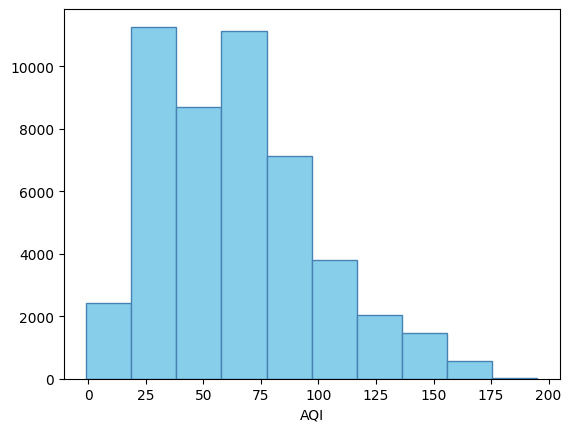

In [55]:
x = df['"aqi"']
plt.hist(x, color = 'skyblue', edgecolor = 'steelblue')
plt.xlabel('AQI')

In [35]:
def aqi_index(x):
    if x <= 50:
        return 'Good'
    elif 51 <= x <= 100:
        return 'Moderate'
    elif 101 <= x <= 150:
        return 'Unhealthy for Sensitive Groups'
    else:
        return 'Unhealthy'

df['aqi_level'] = df['"aqi"'].apply(aqi_index)
df

,"""aqi""","""datacreationdate""","""windspeed""","""winddirec""",氣溫(℃),相對溼度(%),最大陣風(m/s),降水量(mm),降水時數(h),aqi_level
0,22.0,2018-06-01 00:00,2.1,359.0,29.2,76.0,7.5,0.0,0.0,Good
1,24.0,2018-06-01 01:00,2.4,8.4,28.8,78.0,7.1,0.0,0.0,Good
2,24.0,2018-06-01 02:00,2.0,1.4,29.0,77.0,5.1,0.0,0.0,Good
3,23.0,2018-06-01 03:00,1.9,358.0,28.6,79.0,5.3,0.0,0.0,Good
4,22.0,2018-06-01 04:00,2.4,46.0,28.5,79.0,5.9,0.0,0.0,Good
...,...,...,...,...,...,...,...,...,...,...
48789,57.0,2023-05-31 19:00,0.5,323.0,28.7,74.0,9.3,0.0,0.0,Moderate
48790,55.0,2023-05-31 20:00,0.7,353.0,28.4,77.0,8.2,0.0,0.0,Moderate
48791,49.0,2023-05-31 21:00,0.6,352.0,28.0,79.0,9.3,0.0,0.0,Good
48792,44.0,2023-05-31 22:00,0.6,355.0,27.8,81.0,6.5,0.0,0.0,Good


設定字體

In [32]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font=FontProperties(fname=r"/content/drive/MyDrive/BigDataAnalyticsandDataMining/SimHei.ttf",size=16)

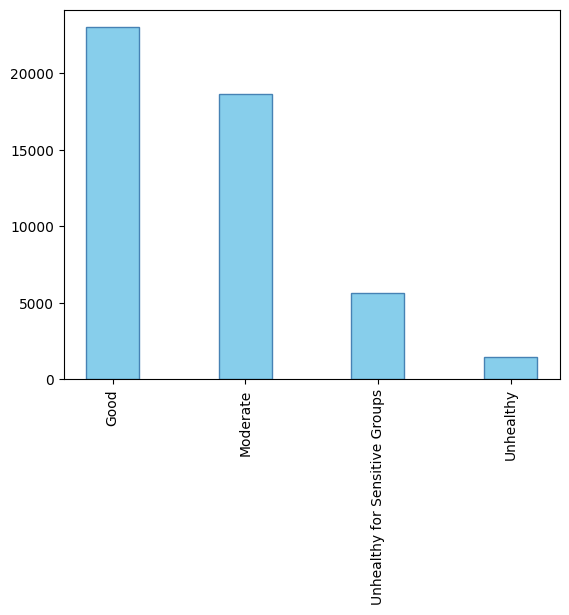

In [54]:
x = df['aqi_level']
plt.bar(x.unique(), x.value_counts(), color = 'skyblue', edgecolor = 'steelblue',  width = 0.4)
plt.xticks(rotation='vertical')
plt.show()

Text(0.5, 0, 'windspeed')

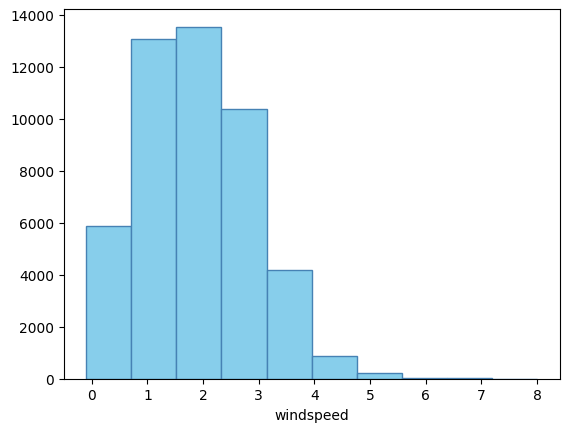

In [57]:
x = df['"windspeed"']
plt.hist(x, color = 'skyblue', edgecolor = 'steelblue')
plt.xlabel('windspeed')

Text(0.5, 0, 'winddirec')

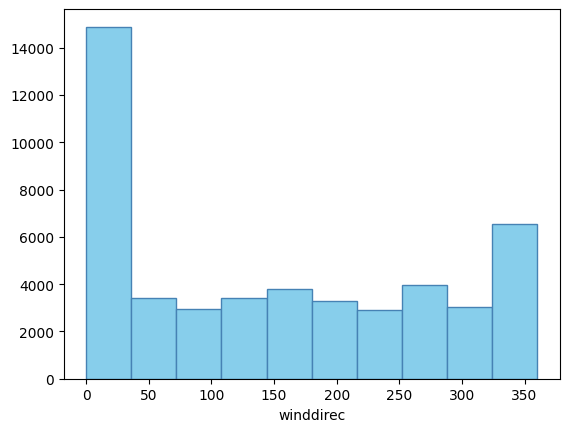

In [141]:
x = df['"winddirec"']
plt.hist(x, color = 'skyblue', edgecolor = 'steelblue')
plt.xlabel('winddirec')

Text(0.5, 0, '氣溫(℃)')

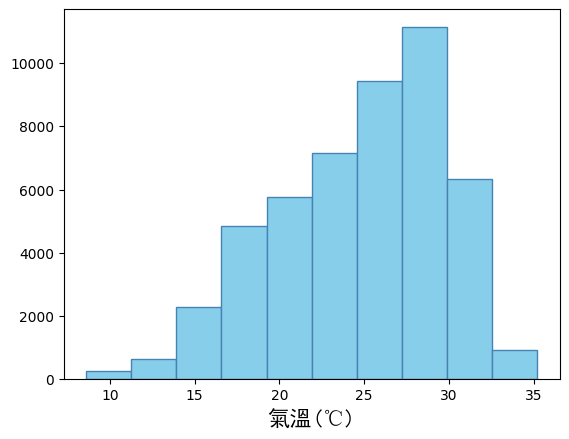

In [140]:
x = df['氣溫(℃)']
plt.hist(x, color = 'skyblue', edgecolor = 'steelblue')
plt.xlabel('氣溫(℃)', fontproperties=font)

Text(0.5, 0, '相對溼度(%)')

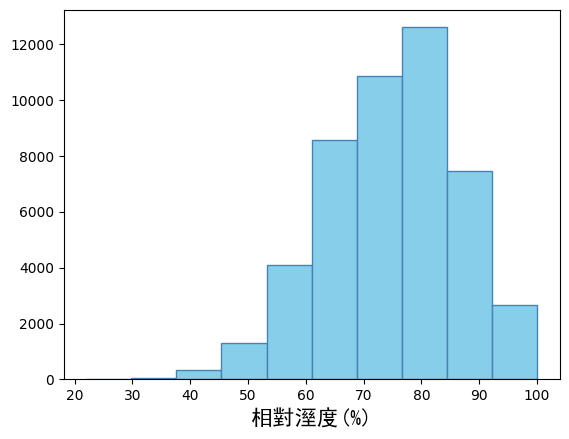

In [142]:
x = df['相對溼度(%)']
plt.hist(x, color = 'skyblue', edgecolor = 'steelblue')
plt.xlabel('相對溼度(%)', fontproperties=font)

Text(0.5, 0, '最大陣風(m/s)')

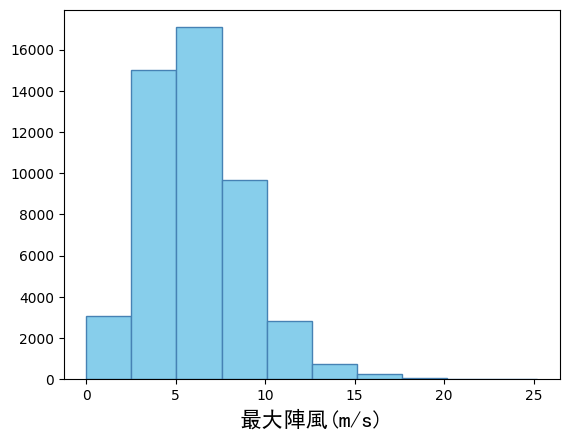

In [143]:
x = df['最大陣風(m/s)']
plt.hist(x, color = 'skyblue', edgecolor = 'steelblue')
plt.xlabel('最大陣風(m/s)', fontproperties=font)

Text(0.5, 0, '降水量(mm)')

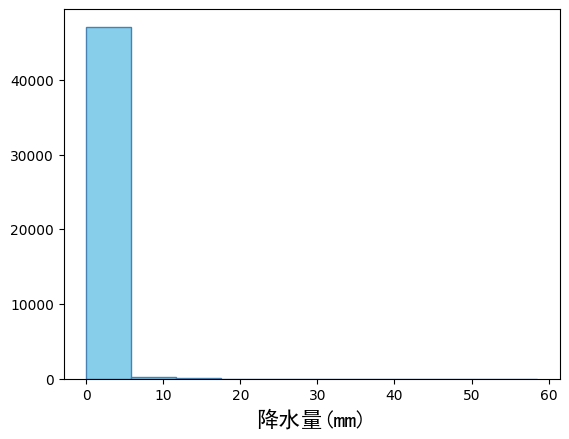

In [144]:
x = df['降水量(mm)']
plt.hist(x, color = 'skyblue', edgecolor = 'steelblue')
plt.xlabel('降水量(mm)', fontproperties=font)

Text(0.5, 0, '降水時數(h)')

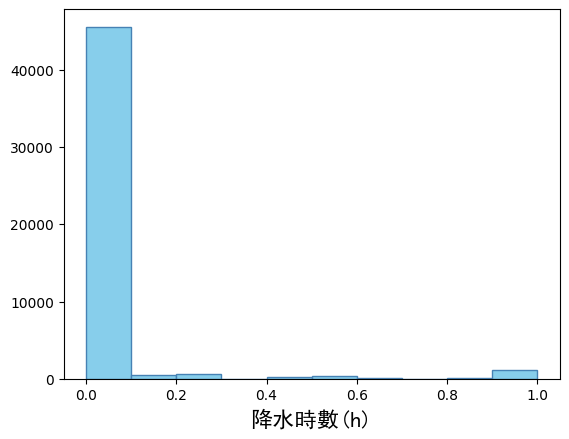

In [145]:
x = df['降水時數(h)']
plt.hist(x, color = 'skyblue', edgecolor = 'steelblue')
plt.xlabel('降水時數(h)', fontproperties=font)

NA imputing

In [18]:
# Process Time Data
# To Pandas datetime format
train_data_use['"datacreationdate"'] = pd.to_datetime(train_data_use['"datacreationdate"'])
test_data_use['"datacreationdate"'] = pd.to_datetime(test_data_use['"datacreationdate"'])

# Sort time data
train_data_use.sort_values('"datacreationdate"', inplace=True)
test_data_use.sort_values('"datacreationdate"', inplace=True)

In [19]:
# Set time as index
train_data_use.set_index('"datacreationdate"', inplace=True)
test_data_use.set_index('"datacreationdate"', inplace=True)

In [20]:
test_data_use.isna().sum()

"aqi"            2
"windspeed"    387
"winddirec"    387
氣溫(℃)            0
相對溼度(%)          0
最大陣風(m/s)        0
降水量(mm)        282
降水時數(h)          0
dtype: int64

In [21]:
train_data_use.isna().sum()

"aqi"          227
"windspeed"    238
"winddirec"    227
氣溫(℃)            3
相對溼度(%)        811
最大陣風(m/s)       13
降水量(mm)        945
降水時數(h)          0
dtype: int64

In [22]:
train_data_use = train_data_use.fillna(method='ffill')
test_data_use = test_data_use.fillna(method='ffill')

In [23]:
train_data_use.isna().sum()

"aqi"          0
"windspeed"    0
"winddirec"    0
氣溫(℃)          0
相對溼度(%)        0
最大陣風(m/s)      0
降水量(mm)        0
降水時數(h)        0
dtype: int64

In [64]:
print('train data shape:', train_data_use.shape)
print('test data shape:', test_data_use.shape)

train data shape: (40094, 8)
test data shape: (8700, 8)


Test start

In [24]:
test_data_use.dtypes

"aqi"          float64
"windspeed"    float64
"winddirec"    float64
氣溫(℃)          float64
相對溼度(%)        float64
最大陣風(m/s)      float64
降水量(mm)        float64
降水時數(h)        float64
dtype: object

In [66]:
train_data_use.isna().sum()

"aqi"          0
"windspeed"    0
"winddirec"    0
氣溫(℃)          0
相對溼度(%)        0
最大陣風(m/s)      0
降水量(mm)        0
降水時數(h)        0
dtype: int64

In [67]:
train_data_use

,"""aqi""","""windspeed""","""winddirec""",氣溫(℃),相對溼度(%),最大陣風(m/s),降水量(mm),降水時數(h)
"""datacreationdate""",,,,,,,,
2018-06-01 00:00:00,22.0,2.1,359.0,29.2,76.0,7.5,0.0,0.0
2018-06-01 01:00:00,24.0,2.4,8.4,28.8,78.0,7.1,0.0,0.0
2018-06-01 02:00:00,24.0,2.0,1.4,29.0,77.0,5.1,0.0,0.0
2018-06-01 03:00:00,23.0,1.9,358.0,28.6,79.0,5.3,0.0,0.0
2018-06-01 04:00:00,22.0,2.4,46.0,28.5,79.0,5.9,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-05-31 19:00:00,24.0,1.0,219.0,29.3,77.0,4.0,0.0,0.0
2022-05-31 20:00:00,23.0,1.4,219.0,29.2,76.0,4.5,0.0,0.0
2022-05-31 21:00:00,22.0,1.1,207.0,29.2,78.0,4.3,0.0,0.0


Decision Tree

In [25]:
# 從訓練集和測試集中分離特徵和目標變數
X_train = train_data_use.drop('"aqi"', axis=1)
y_train = train_data_use['"aqi"']
X_test = test_data_use.drop('"aqi"', axis=1)
y_test = test_data_use['"aqi"']

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
y_train_pred_scaled = tree.predict(X_train_scaled)
y_test_pred_scaled = tree.predict(X_test_scaled)

In [28]:
y_train_pred_scaled

array([22., 24., 24., ..., 22., 32., 19.])

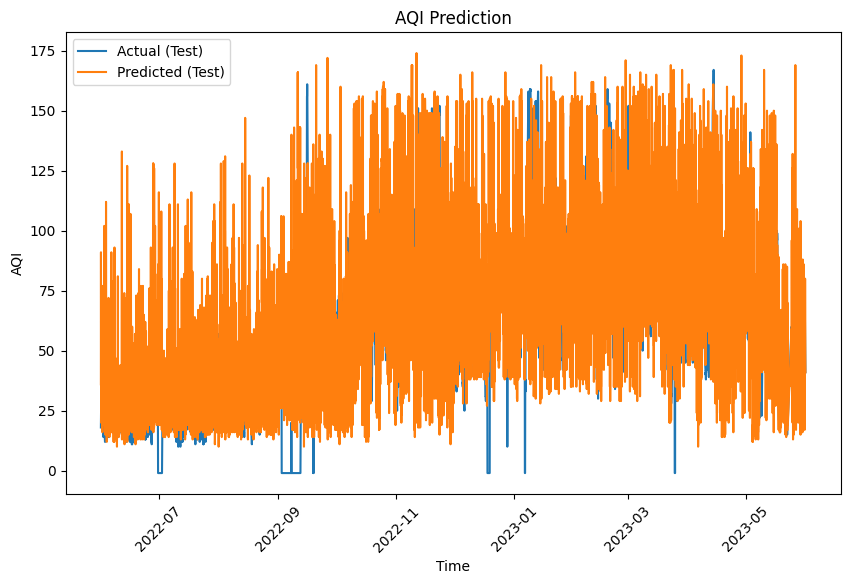

In [29]:
train_dates = train_data_use.index
test_dates = test_data_use.index

plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test, label='Actual (Test)')
plt.plot(test_dates, y_test_pred_scaled, label='Predicted (Test)')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.title('AQI Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [105]:
# 定義分類閥值和對應的分類標籤
thresholds = [0, 50, 100, 150, 200]
labels = ['良好', '普通', '對敏感族群不健康', '對所有族群不健康']

# 使用np.digitize將數值轉換為分類標籤的索引值
indices_test = np.digitize(y_test, thresholds)
indices_test_prd = np.digitize(y_test_pred_scaled, thresholds)

# 根據索引值將數值轉換為對應的分類標籤
y_test = [labels[i-1] for i in indices_test]
y_test_pred = [labels[i-1] for i in indices_test_prd]

# 計算測試集的準確率
accuracy_train = accuracy_score(y_test, y_test_pred)
print("訓練集準確率：", accuracy_train)

# 計算測試集的混淆矩陣
confusion_matrix_test = confusion_matrix(y_test, y_test_pred, labels=labels)
print("測試集混淆矩陣：")
print(confusion_matrix_test)

訓練集準確率： 0.5495402298850575
測試集混淆矩陣：
[[2167  868  165   20]
 [1032 2467  716  126]
 [ 112  418  134   29]
 [ 216  169   48   13]]


Random Forest

In [30]:
pip install tsfresh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 15.6 MB/s eta 0:00:00


In [31]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.1/119.1 kB 7.3 MB/s eta 0:00:00


In [32]:
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
from tsfresh import extract_features
from sktime.regression.interval_based import TimeSeriesForestRegressor

In [33]:
# 從訓練集和測試集中分離特徵和目標變數
X_train = train_data_use.drop('"aqi"', axis=1)
y_train = train_data_use['"aqi"']
X_test = test_data_use.drop('"aqi"', axis=1)
y_test = test_data_use['"aqi"']

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
rf = TimeSeriesForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train_scaled, y_train)

TimeSeriesForestRegressor(n_estimators=100, random_state=0)

In [35]:
y_train_pred_scaled = rf.predict(X_train_scaled)
y_test_pred_scaled = rf.predict(X_test_scaled)

In [36]:
y_train_pred_scaled

array([24.73882353, 26.77538462, 27.128     , ..., 24.7325    ,
       34.44923077, 26.2864    ])

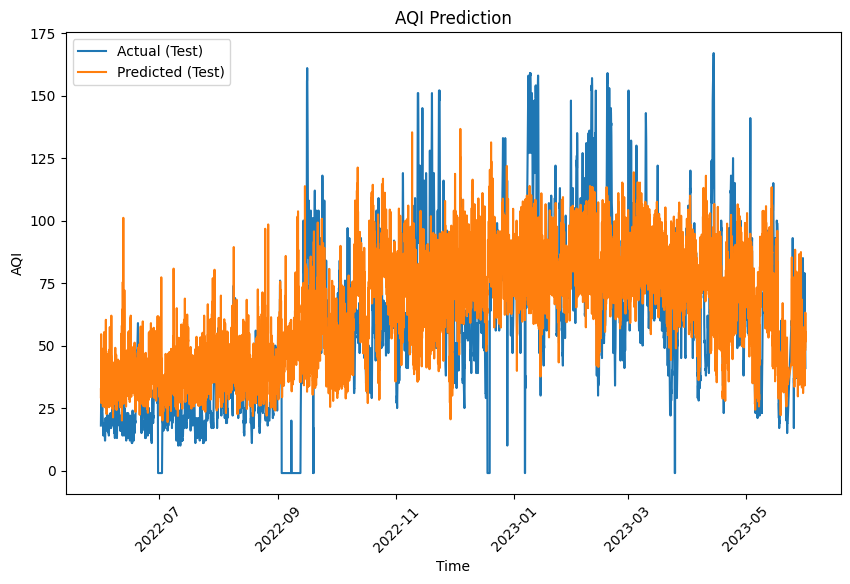

In [37]:
train_dates = train_data_use.index
test_dates = test_data_use.index

plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test, label='Actual (Test)')
plt.plot(test_dates, y_test_pred_scaled, label='Predicted (Test)')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.title('AQI Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [98]:
# 定義分類閥值和對應的分類標籤
thresholds = [0, 50, 100, 150, 200]
labels = ['良好', '普通', '對敏感族群不健康', '對所有族群不健康']

# 使用np.digitize將數值轉換為分類標籤的索引值
indices_test = np.digitize(y_test, thresholds)
indices_test_prd = np.digitize(y_test_pred_scaled, thresholds)

# 根據索引值將數值轉換為對應的分類標籤
y_test = [labels[i-1] for i in indices_test]
y_test_pred = [labels[i-1] for i in indices_test_prd]

# 計算測試集的準確率
accuracy_train = accuracy_score(y_test, y_test_pred)
print("訓練集準確率：", accuracy_train)

# 計算測試集的混淆矩陣
confusion_matrix_test = confusion_matrix(y_test, y_test_pred, labels=labels)
print("測試集混淆矩陣：")
print(confusion_matrix_test)

訓練集準確率： 0.6739080459770115
測試集混淆矩陣：
[[2141 1043   36    0]
 [ 493 3661  187    0]
 [  26  606   61    0]
 [ 166  259   21    0]]


LightGBM

In [73]:
# 從訓練集和測試集中分離特徵和目標變數
X_train = train_data_use.drop('"aqi"', axis=1)
y_train = train_data_use['"aqi"']
X_test = test_data_use.drop('"aqi"', axis=1)
y_test = test_data_use['"aqi"']

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix

In [75]:
dtrain = lgb.Dataset(X_train_scaled, label=y_train)
dtest = lgb.Dataset(X_test_scaled, label=y_test)

In [76]:
params = {'num_leaves':31, 'num_trees':100, 'objective':'regression'}
params['metric'] = 'rmse'
num_round=100
model = lgb.train(params, dtrain, num_round)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 40094, number of used features: 7
[LightGBM] [Info] Start training from score 65.106500


In [67]:
dtrain

In [77]:
y_train_pred_scaled = model.predict(X_train_scaled)
y_test_pred_scaled = model.predict(X_test_scaled)

In [69]:
y_test_pred_scaled

array([30.86436569, 31.87248669, 29.76807033, ..., 54.86093734,
       51.49232213, 52.68523219])

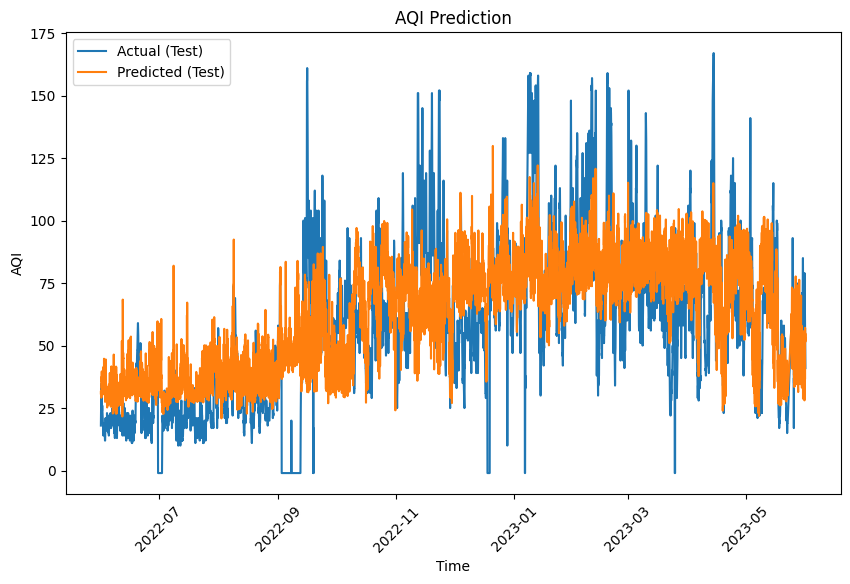

In [78]:
train_dates = train_data_use.index
test_dates = test_data_use.index

plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test, label='Actual (Test)')
plt.plot(test_dates, y_test_pred_scaled, label='Predicted (Test)')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.title('AQI Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [71]:
# 定義分類閥值和對應的分類標籤
thresholds = [0, 50, 100, 150, 200]
labels = ['良好', '普通', '對敏感族群不健康', '對所有族群不健康']

# 使用np.digitize將數值轉換為分類標籤的索引值
indices_test = np.digitize(y_test, thresholds)
indices_test_prd = np.digitize(y_test_pred_scaled, thresholds)

# 根據索引值將數值轉換為對應的分類標籤
y_test = [labels[i-1] for i in indices_test]
y_test_pred = [labels[i-1] for i in indices_test_prd]

# 計算測試集的準確率
accuracy_train = accuracy_score(y_test, y_test_pred)
print("訓練集準確率：", accuracy_train)

# 計算測試集的混淆矩陣
confusion_matrix_test = confusion_matrix(y_test, y_test_pred, labels=labels)
print("測試集混淆矩陣：")
print(confusion_matrix_test)

訓練集準確率： 0.7028735632183908
測試集混淆矩陣：
[[2341  878    1    0]
 [ 544 3738   59    0]
 [  23  634   36    0]
 [ 204  229   13    0]]
